In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# đổi đường dẫn tới đúng folder của bạn
os.chdir('/content/drive/MyDrive/Python_assignment/Matplot')

# kiểm tra xem có file không
print(os.getcwd())
!ls

/content/drive/MyDrive/Python_assignment/Matplot
matplotlib.ipynb  netflix_titles.csv


In [6]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv", encoding="latin1")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optimize style
plt.style.use("ggplot")


1. Bar chart — Số lượng Movie vs TV Show

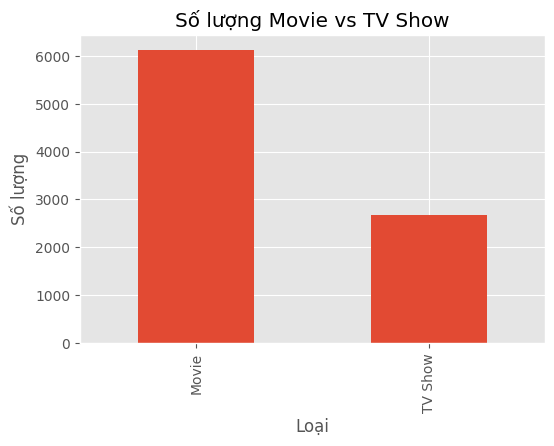

In [7]:
df['type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Số lượng Movie vs TV Show")
plt.xlabel("Loại")
plt.ylabel("Số lượng")
plt.show()
# Xem trên Netflix (trong dataset này) có bao nhiêu Movie và bao nhiêu TV Show, loại nào chiếm ưu thế.

2) Histogram — Phân phối năm phát hành

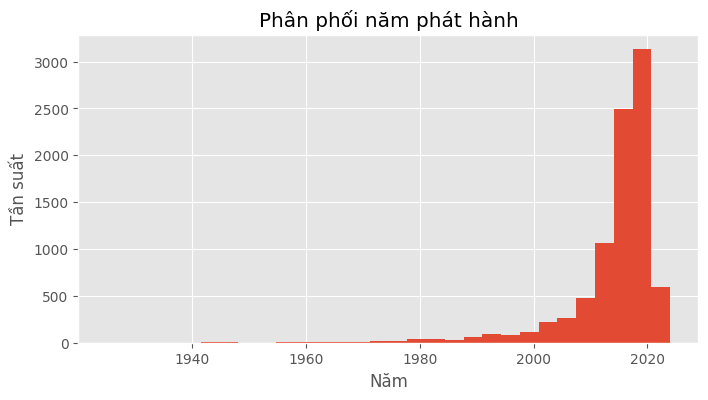

In [8]:
plt.figure(figsize=(8,4))
df['release_year'].hist(bins=30)
plt.title("Phân phối năm phát hành")
plt.xlabel("Năm")
plt.ylabel("Tần suất")
plt.show()
#Xem phim/series trong dataset được phát hành tập trung ở giai đoạn nào: cổ điển, trung bình, hay hiện đại.
# tuy nhiên  Histogram nhạy cảm với bins.
# Histogram chia dữ liệu thành nhiều khoảng (bins).
# Ví dụ: năm phát hành từ 1950 → 2020 chia thành 20 bins.

3. Pie chart — Tỉ lệ Movie / TV Show

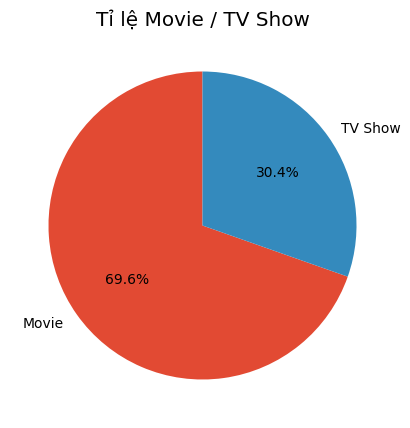

In [11]:
df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5),
    startangle=90
)
plt.title("Tỉ lệ Movie / TV Show")
plt.ylabel("")
plt.show()
#Không chỉ là số lượng tuyệt đối, mà là tỷ lệ phần trăm mỗi loại trong tổng thể.

4. Countplot — Rating

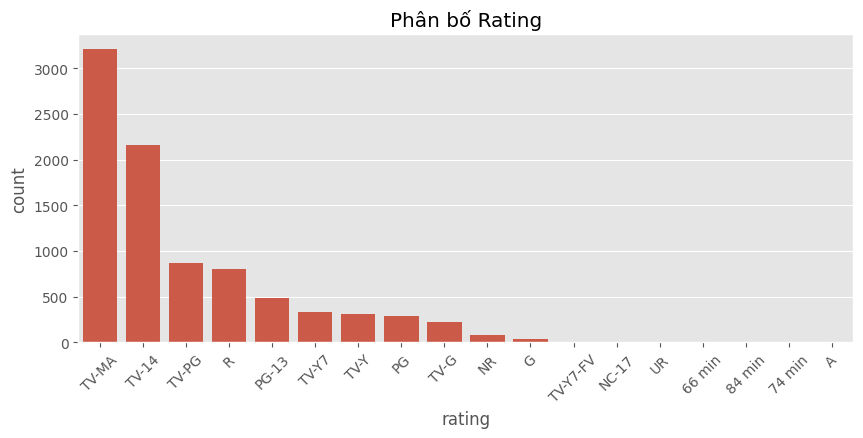

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title("Phân bố Rating")
plt.xticks(rotation=45)
plt.show()
#Xem các mức phân loại độ tuổi (rating) (G, PG, PG-13, TV-MA, R,…) xuất hiện nhiều hay ít.

5. Line plot — Số phim theo năm

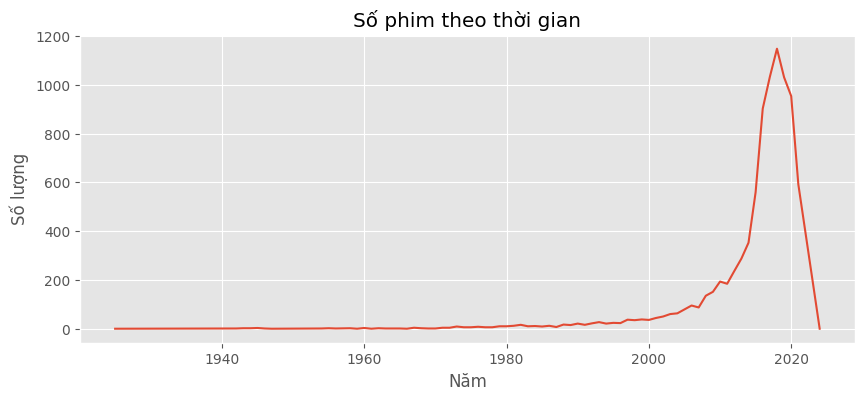

In [16]:
year_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(year_count.index, year_count.values)
plt.title("Số phim theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Số lượng")
plt.show()
#Xem số lượng phim/series thay đổi theo thời gian như thế nào (xu hướng tăng/giảm).

6. Heatmap — Tương quan (Movie)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-692687528.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_minutes'] = df_movies['duration'].str.replace(" min","", regex=False).astype(str).str.extract('(\d+)').astype(float)


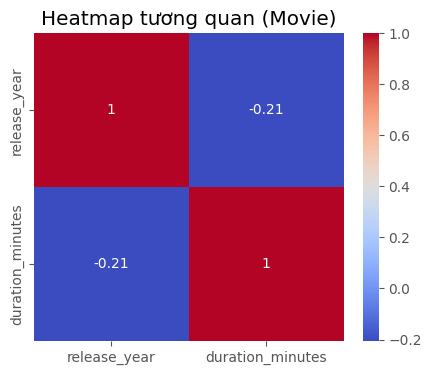

In [17]:
df_movies = df[df['type']=="Movie"].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(" min","", regex=False).astype(str).str.extract('(\d+)').astype(float)

cor_df = df_movies[['release_year','duration_minutes']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(cor_df, annot=True, cmap='coolwarm')
plt.title("Heatmap tương quan (Movie)")
plt.show()
# #Khám phá mối quan hệ tuyến tính giữa các biến số:

# release_year (năm phát hành)

# duration_minutes (độ dài phim)

# Nếu corr(release_year, duration) ≈ 0 → độ dài phim không phụ thuộc nhiều vào năm phát hành.

# Nếu dương nhẹ → phim hiện đại có xu hướng dài hơn (hoặc ngược lại).

# Đây là dạng biểu đồ thích hợp để tóm tắt nhiều biến số số học, tuy ở đây chỉ có 2.


7. Violin Plot — Duration vs Rating

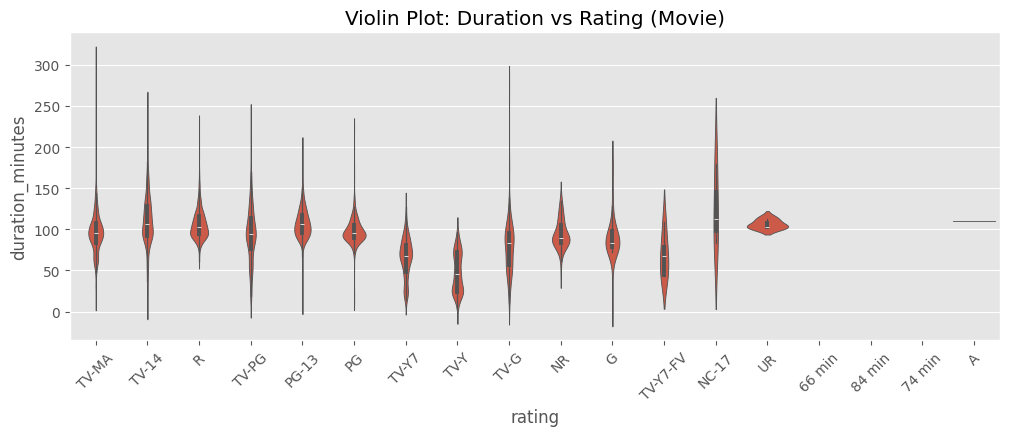

In [18]:
plt.figure(figsize=(12,4))
sns.violinplot(
    data=df_movies.dropna(subset=['duration_minutes']),
    x='rating',
    y='duration_minutes',
    order=df_movies['rating'].value_counts().index
)
plt.title("Violin Plot: Duration vs Rating (Movie)")
plt.xticks(rotation=45)
plt.show()


8. Scatter plot — Release year vs Duration

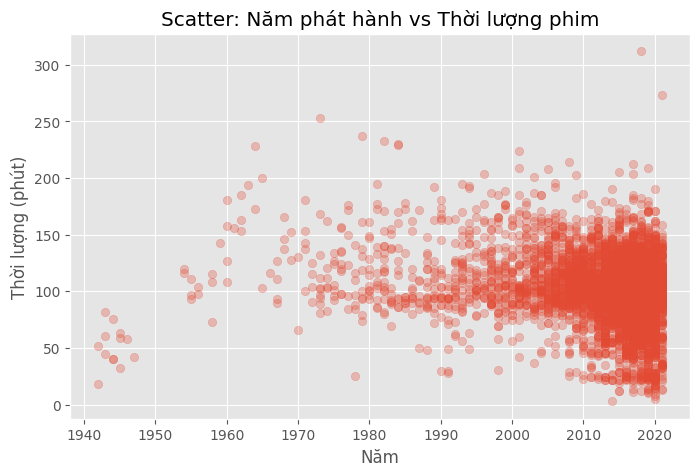

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(
    df_movies['release_year'],
    df_movies['duration_minutes'],
    alpha=0.3
)
plt.title("Scatter: Năm phát hành vs Thời lượng phim")
plt.xlabel("Năm")
plt.ylabel("Thời lượng (phút)")
plt.show()

# Thể hiện từng phim lẻ như một điểm, để nhìn tổng quan mối quan hệ năm phát hành – độ dài.

# #Mỗi chấm = 1 phim:

# Điểm càng cao → phim càng dài.

# Điểm càng về bên phải → phim càng mới.

9. Area Plot — Số phim theo năm

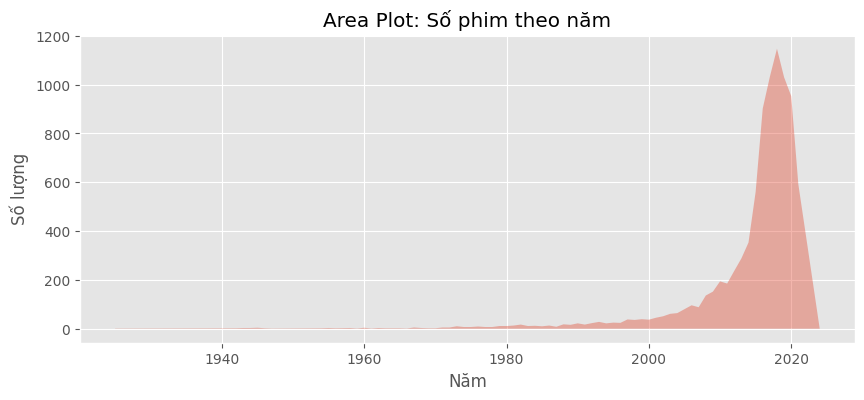

In [20]:
plt.figure(figsize=(10,4))
plt.fill_between(year_count.index, year_count.values, alpha=0.4)
plt.title("Area Plot: Số phim theo năm")
plt.xlabel("Năm")
plt.ylabel("Số lượng")
plt.show()
#Cùng dữ liệu với line plot số 5, nhưng trình bày dưới dạng vùng được tô màu → nhìn rõ “khối lượng” theo thời gian.

10. KDE Plot — Release year distribution

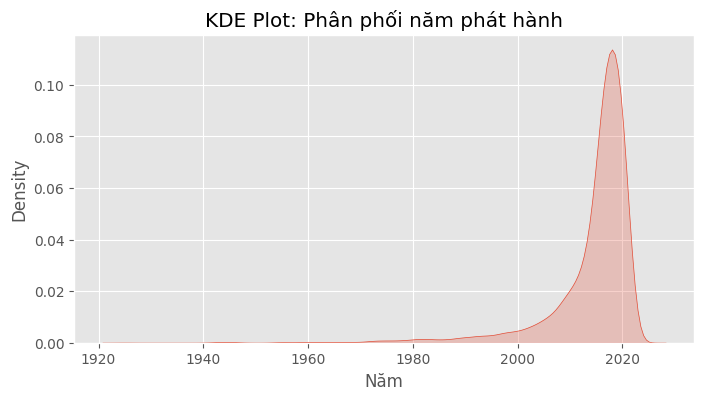

In [21]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['release_year'], fill=True)
plt.title("KDE Plot: Phân phối năm phát hành")
plt.xlabel("Năm")
plt.show()
#Thay vì histogram dạng cột, KDE (Kernel Density Estimation) cho một đường cong liên tục biểu diễn phân phối năm phát hành.

#KDE (Kernel Density Estimation) không dùng bins.
# Nó dùng một hàm "kernel" để làm mềm phân phối → tạo đường cong mượt.

# Thay vì chia thành bins, KDE "trượt" một kernel qua dữ liệu và ước lượng mật độ tại mỗi điểm trên trục X.